In [ ]:
# Import required libraries:
import json
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen
from sklearn.preprocessing import MinMaxScaler

# Import plotting libraries:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from matplotlib.patches import Arc
from plotly.subplots import make_subplots

In [ ]:
# Scrape RL player stats:
cris_scrape_url = "https://understat.com/player/227"
page_connect = urlopen(cris_scrape_url)
page_html = BeautifulSoup(page_connect, "html.parser")

json_raw_string = page_html.findAll(name="script")[1].text
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")

json_data = json_raw_string[start_ind:stop_ind]
json_data = json_data.encode("utf8").decode("unicode_escape")

rl_season_wise_meta_df = pd.json_normalize(json.loads(json_data)["season"])
rl_season_wise_meta_df.insert(0, "Player", "Robert Lewandowski")

In [ ]:
rl_season_wise_meta_df

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
0,Robert Lewandowski,FW,15,16,63,1273,16.05402047932148,1,3.0662702172994614,19,2021,Bayern Munich,1,0,13,13.780690491199493,18.06838420033455,3.7300929129123688
1,Robert Lewandowski,FW,29,41,135,2467,32.07735199481249,7,4.8155501037836075,32,2020,Bayern Munich,4,0,33,25.257361985743046,31.74017623066902,5.689343474805355
2,Robert Lewandowski,FW,31,34,138,2763,31.196764232590795,4,7.27112489938736,36,2019,Bayern Munich,5,0,29,27.40788071230054,39.65040745027363,9.743498254567385
3,Robert Lewandowski,FW,33,22,144,2959,33.14324213936925,7,9.613417826592922,47,2018,Bayern Munich,2,0,19,30.112296249717474,41.9232893884182,8.940890244208276
4,Robert Lewandowski,FW,30,29,127,2163,27.895815512165427,2,2.3904438270255923,22,2017,Bayern Munich,1,0,23,22.591378761455417,28.035747051239014,5.410496477037668
5,Robert Lewandowski,FW,33,30,143,2781,30.09775198251009,5,5.550539489835501,30,2016,Bayern Munich,5,0,25,26.309111513197422,33.58735306560993,7.891287753358483
6,Robert Lewandowski,FW,32,30,152,2654,28.46237726509571,2,3.455625979229808,22,2015,Bayern Munich,2,0,28,26.94682390987873,34.54226553440094,8.226694845594466
7,Robert Lewandowski,FW,31,17,104,2493,17.722183350473642,5,4.644012805074453,32,2014,Bayern Munich,0,0,16,16.96440664306283,23.31542954593897,4.924822298809886


In [ ]:
rl_season_wise_meta_df = rl_season_wise_meta_df[rl_season_wise_meta_df["season"] == "2020"]

In [ ]:
rl_season_wise_meta_df

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
1,Robert Lewandowski,FW,29,41,135,2467,32.07735199481249,7,4.8155501037836075,32,2020,Bayern Munich,4,0,33,25.257361985743046,31.74017623066902,5.689343474805355


In [ ]:
# Scrape Lewandowski shot data:
json_raw_string = page_html.findAll(name="script")[3].text
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")

json_data = json_raw_string[start_ind:stop_ind]
json_data = json_data.encode("utf8").decode("unicode_escape")

rl_shots_df = pd.json_normalize(json.loads(json_data))
rl_shots_df.insert(0, "Player", "Robert Lewandowski")

In [ ]:
rl_shots_df

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,Robert Lewandowski,24344,29,SavedShot,0.9180000305175782,0.5309999847412109,0.11107819527387619,Robert Lewandowski,h,227,OpenPlay,2014,RightFoot,5447,Bayern Munich,Wolfsburg,2,1,2014-08-22 19:30:00,Gianluca Gaudino,Chipped
1,Robert Lewandowski,24351,56,SavedShot,0.8530000305175781,0.3820000076293945,0.3517444133758545,Robert Lewandowski,h,227,OpenPlay,2014,RightFoot,5447,Bayern Munich,Wolfsburg,2,1,2014-08-22 19:30:00,David Alaba,Throughball
2,Robert Lewandowski,24561,4,SavedShot,0.8530000305175781,0.5790000152587891,0.08507019281387329,Robert Lewandowski,a,227,OpenPlay,2014,RightFoot,5462,Schalke 04,Bayern Munich,1,1,2014-08-30 17:30:00,Philipp Lahm,Pass
3,Robert Lewandowski,24562,9,Goal,0.92,0.4759999847412109,0.5419282913208008,Robert Lewandowski,a,227,OpenPlay,2014,RightFoot,5462,Schalke 04,Bayern Munich,1,1,2014-08-30 17:30:00,Sebastian Rode,Pass
4,Robert Lewandowski,24574,65,MissedShots,0.915,0.34200000762939453,0.046399910002946854,Robert Lewandowski,a,227,OpenPlay,2014,RightFoot,5462,Schalke 04,Bayern Munich,1,1,2014-08-30 17:30:00,David Alaba,Chipped
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,Robert Lewandowski,446373,76,Goal,0.885,0.5,0.75777667760849,Robert Lewandowski,a,227,Penalty,2021,RightFoot,17641,Borussia Dortmund,Bayern Munich,2,3,2021-12-04 17:30:00,None,Standard
1002,Robert Lewandowski,446377,96,MissedShots,0.7469999694824219,0.7,0.04512755945324898,Robert Lewandowski,a,227,DirectFreekick,2021,RightFoot,17641,Borussia Dortmund,Bayern Munich,2,3,2021-12-04 17:30:00,None,Standard
1003,Robert Lewandowski,447571,16,BlockedShot,0.7919999694824219,0.575999984741211,0.03959651663899422,Robert Lewandowski,h,227,OpenPlay,2021,RightFoot,17650,Bayern Munich,Mainz 05,2,1,2021-12-11 14:30:00,Jamal Musiala,Pass
1004,Robert Lewandowski,447575,32,MissedShots,0.9640000152587891,0.6959999847412109,0.011924787424504757,Robert Lewandowski,h,227,FromCorner,2021,Head,17650,Bayern Munich,Mainz 05,2,1,2021-12-11 14:30:00,Kingsley Coman,Aerial


In [ ]:
rl_shots_df = rl_shots_df[rl_shots_df["season"]=="2020"]

In [ ]:
rl_shots_df

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
808,Robert Lewandowski,378394,4,BlockedShot,0.914000015258789,0.5659999847412109,0.46233803033828735,Robert Lewandowski,h,227,OpenPlay,2020,RightFoot,14173,Bayern Munich,Schalke 04,8,0,2020-09-18 18:30:00,Leroy Sané,Pass
809,Robert Lewandowski,378396,12,BlockedShot,0.8519999694824218,0.39599998474121095,0.09444613009691238,Robert Lewandowski,h,227,OpenPlay,2020,RightFoot,14173,Bayern Munich,Schalke 04,8,0,2020-09-18 18:30:00,Leroy Sané,Pass
810,Robert Lewandowski,378399,20,MissedShots,0.860999984741211,0.4179999923706055,0.12052113562822342,Robert Lewandowski,h,227,OpenPlay,2020,LeftFoot,14173,Bayern Munich,Schalke 04,8,0,2020-09-18 18:30:00,Leroy Sané,Pass
811,Robert Lewandowski,378401,30,Goal,0.885,0.5,0.75777667760849,Robert Lewandowski,h,227,Penalty,2020,RightFoot,14173,Bayern Munich,Schalke 04,8,0,2020-09-18 18:30:00,None,Standard
812,Robert Lewandowski,379517,69,MissedShots,0.8880000305175781,0.6840000152587891,0.0476410835981369,Robert Lewandowski,a,227,OpenPlay,2020,RightFoot,14189,Hoffenheim,Bayern Munich,4,1,2020-09-27 13:30:00,Leroy Sané,BallTouch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,Robert Lewandowski,423617,56,BlockedShot,0.975999984741211,0.5670000076293945,0.1371191442012787,Robert Lewandowski,h,227,OpenPlay,2020,RightFoot,15437,Bayern Munich,Augsburg,5,2,2021-05-22 13:30:00,David Alaba,SubstitutionOn
939,Robert Lewandowski,423620,69,SavedShot,0.7880000305175782,0.34799999237060547,0.07906012237071991,Robert Lewandowski,h,227,DirectFreekick,2020,RightFoot,15437,Bayern Munich,Augsburg,5,2,2021-05-22 13:30:00,None,Standard
940,Robert Lewandowski,423622,79,MissedShots,0.93,0.49900001525878906,0.0627477839589119,Robert Lewandowski,h,227,FromCorner,2020,Head,15437,Bayern Munich,Augsburg,5,2,2021-05-22 13:30:00,Joshua Kimmich,Aerial
941,Robert Lewandowski,423623,79,MissedShots,0.904000015258789,0.46599998474121096,0.024884330108761787,Robert Lewandowski,h,227,FromCorner,2020,Head,15437,Bayern Munich,Augsburg,5,2,2021-05-22 13:30:00,Corentin Tolisso,Aerial


In [ ]:
# Scrape Messi player stats:
messi_scrape_url = "https://understat.com/player/2097"
page_connect = urlopen(messi_scrape_url)
page_html = BeautifulSoup(page_connect, "html.parser")

json_raw_string = page_html.findAll(name="script")[1].text
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")

json_data = json_raw_string[start_ind:stop_ind]
json_data = json_data.encode("utf8").decode("unicode_escape")

messi_season_wise_meta_df = pd.json_normalize(json.loads(json_data)["season"])
messi_season_wise_meta_df.insert(0, "Player", "Messi")

In [ ]:
messi_season_wise_meta_df

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
0,Messi,Sub,9,1,35,689,3.8598678559064865,3,3.2487380988895893,21,2021,Paris Saint Germain,0,0,1,3.8598678559064865,8.129020392894745,3.1627869941294193
1,Messi,FW,35,30,195,3017,26.676843278110027,9,11.422847747802734,77,2020,Barcelona,4,0,27,22.96045546978712,37.906863175332546,20.33736250922084
2,Messi,Sub,33,25,159,2876,20.84966728463769,20,16.593363385647535,88,2019,Barcelona,4,0,20,17.133279267698526,34.92346678301692,13.53765751607716
3,Messi,FW,34,36,170,2704,25.997169069945812,13,15.33516551926732,93,2018,Barcelona,3,0,32,22.28090887516737,38.45987746119499,10.69879900291562
4,Messi,FW,36,34,196,2995,28.946280613541603,12,15.100405622273684,87,2017,Barcelona,3,0,32,25.973170146346092,48.18063422292471,21.634404016658664
5,Messi,FWR,34,37,179,2832,26.885174363851547,9,13.955131396651268,79,2016,Barcelona,6,0,31,21.682230830192566,42.52504535019398,18.13351222872734
6,Messi,FWR,33,26,158,2726,27.101910315454006,16,15.871278138831258,77,2015,Barcelona,3,0,23,21.899351350963116,41.99686624109745,15.196364373899996
7,Messi,FW,38,43,187,3374,35.89176357910037,18,17.61195552162826,95,2014,Barcelona,4,0,38,31.432097773998976,54.75360991060734,19.75672373920679


In [ ]:
messi_season_wise_meta_df = messi_season_wise_meta_df[messi_season_wise_meta_df["season"]=="2020"]

In [ ]:
messi_season_wise_meta_df

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
1,Messi,FW,35,30,195,3017,26.676843278110027,9,11.422847747802734,77,2020,Barcelona,4,0,27,22.96045546978712,37.906863175332546,20.33736250922084


In [ ]:
# Scrape Messi shot data:
json_raw_string = page_html.findAll(name="script")[3].text
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")

json_data = json_raw_string[start_ind:stop_ind]
json_data = json_data.encode("utf8").decode("unicode_escape")

messi_shots_df = pd.json_normalize(json.loads(json_data))
messi_shots_df.insert(0, "Player", "Messi")

In [ ]:
messi_shots_df

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,Messi,32522,22,MissedShots,0.7859999847412109,0.52,0.03867039829492569,Lionel Messi,h,2097,OpenPlay,2014,LeftFoot,5831,Barcelona,Elche,3,0,2014-08-24 20:00:00,Rafinha,Pass
1,Messi,32525,41,Goal,0.8619999694824219,0.615,0.06870150566101074,Lionel Messi,h,2097,OpenPlay,2014,LeftFoot,5831,Barcelona,Elche,3,0,2014-08-24 20:00:00,Sergio Busquets,BallRecovery
2,Messi,32529,62,Goal,0.86,0.435,0.15034306049346924,Lionel Messi,h,2097,OpenPlay,2014,LeftFoot,5831,Barcelona,Elche,3,0,2014-08-24 20:00:00,None,TakeOn
3,Messi,32769,3,SavedShot,0.8180000305175781,0.38,0.045503295958042145,Lionel Messi,a,2097,OpenPlay,2014,LeftFoot,5842,Villarreal,Barcelona,0,1,2014-08-31 18:00:00,Pedro,Pass
4,Messi,32773,27,SavedShot,0.8690000152587891,0.19200000762939454,0.06531666964292526,Lionel Messi,a,2097,DirectFreekick,2014,LeftFoot,5842,Villarreal,Barcelona,0,1,2014-08-31 18:00:00,None,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,Messi,446499,17,ShotOnPost,0.795,0.4909999847412109,0.04724498093128204,Lionel Messi,a,2097,OpenPlay,2021,LeftFoot,17991,Lens,Paris Saint Germain,1,1,2021-12-04 20:00:00,Marco Verratti,BallRecovery
1275,Messi,446511,44,BlockedShot,0.879000015258789,0.6329999923706054,0.09656360000371933,Lionel Messi,a,2097,OpenPlay,2021,LeftFoot,17991,Lens,Paris Saint Germain,1,1,2021-12-04 20:00:00,Marco Verratti,TakeOn
1276,Messi,446523,86,BlockedShot,0.91,0.705,0.044127415865659714,Lionel Messi,a,2097,OpenPlay,2021,LeftFoot,17991,Lens,Paris Saint Germain,1,1,2021-12-04 20:00:00,None,None
1277,Messi,446526,92,BlockedShot,0.7469999694824219,0.5070000076293946,0.021876486018300056,Lionel Messi,a,2097,OpenPlay,2021,LeftFoot,17991,Lens,Paris Saint Germain,1,1,2021-12-04 20:00:00,Ángel Di María,Pass


In [ ]:
messi_shots_df = messi_shots_df[messi_shots_df["season"]=='2020']

In [ ]:
messi_shots_df

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
1049,Messi,379833,25,BlockedShot,0.960999984741211,0.5720000076293945,0.5961030125617981,Lionel Messi,h,2097,OpenPlay,2020,LeftFoot,14156,Barcelona,Villarreal,4,0,2020-09-27 19:00:00,Anssumane Fati,Pass
1050,Messi,379835,34,Goal,0.885,0.5,0.7432776093482971,Lionel Messi,h,2097,Penalty,2020,LeftFoot,14156,Barcelona,Villarreal,4,0,2020-09-27 19:00:00,None,Standard
1051,Messi,379840,48,SavedShot,0.894000015258789,0.585,0.13612700998783112,Lionel Messi,h,2097,OpenPlay,2020,LeftFoot,14156,Barcelona,Villarreal,4,0,2020-09-27 19:00:00,Anssumane Fati,Throughball
1052,Messi,379843,65,SavedShot,0.874000015258789,0.2589999961853027,0.0511762872338295,Lionel Messi,h,2097,OpenPlay,2020,LeftFoot,14156,Barcelona,Villarreal,4,0,2020-09-27 19:00:00,Frenkie de Jong,Pass
1053,Messi,379844,71,MissedShots,0.9119999694824219,0.4929999923706055,0.40995192527770996,Lionel Messi,h,2097,OpenPlay,2020,Head,14156,Barcelona,Villarreal,4,0,2020-09-27 19:00:00,Jordi Alba,Cross
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1239,Messi,422600,18,MissedShots,0.9519999694824218,0.6659999847412109,0.06496187299489975,Lionel Messi,h,2097,OpenPlay,2020,LeftFoot,15141,Barcelona,Celta Vigo,1,2,2021-05-16 16:30:00,Antoine Griezmann,Chipped
1240,Messi,422601,27,Goal,0.925,0.4370000076293945,0.3019910752773285,Lionel Messi,h,2097,OpenPlay,2020,Head,15141,Barcelona,Celta Vigo,1,2,2021-05-16 16:30:00,Sergio Busquets,Chipped
1241,Messi,422604,41,BlockedShot,0.7659999847412109,0.42400001525878905,0.032836854457855225,Lionel Messi,h,2097,OpenPlay,2020,LeftFoot,15141,Barcelona,Celta Vigo,1,2,2021-05-16 16:30:00,Antoine Griezmann,TakeOn
1242,Messi,422612,84,SavedShot,0.8269999694824218,0.3970000076293945,0.05391271412372589,Lionel Messi,h,2097,SetPiece,2020,LeftFoot,15141,Barcelona,Celta Vigo,1,2,2021-05-16 16:30:00,Sergio Busquets,Chipped


In [ ]:
season_wise_meta_df = rl_season_wise_meta_df.append(messi_season_wise_meta_df)
season_wise_meta_df

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
1,Robert Lewandowski,FW,29,41,135,2467,32.07735199481249,7,4.8155501037836075,32,2020,Bayern Munich,4,0,33,25.257361985743046,31.74017623066902,5.689343474805355
1,Messi,FW,35,30,195,3017,26.676843278110027,9,11.422847747802734,77,2020,Barcelona,4,0,27,22.96045546978712,37.906863175332546,20.33736250922084


In [ ]:
shots_df = rl_shots_df.append(messi_shots_df)
shots_df

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
808,Robert Lewandowski,378394,4,BlockedShot,0.914000015258789,0.5659999847412109,0.46233803033828735,Robert Lewandowski,h,227,OpenPlay,2020,RightFoot,14173,Bayern Munich,Schalke 04,8,0,2020-09-18 18:30:00,Leroy Sané,Pass
809,Robert Lewandowski,378396,12,BlockedShot,0.8519999694824218,0.39599998474121095,0.09444613009691238,Robert Lewandowski,h,227,OpenPlay,2020,RightFoot,14173,Bayern Munich,Schalke 04,8,0,2020-09-18 18:30:00,Leroy Sané,Pass
810,Robert Lewandowski,378399,20,MissedShots,0.860999984741211,0.4179999923706055,0.12052113562822342,Robert Lewandowski,h,227,OpenPlay,2020,LeftFoot,14173,Bayern Munich,Schalke 04,8,0,2020-09-18 18:30:00,Leroy Sané,Pass
811,Robert Lewandowski,378401,30,Goal,0.885,0.5,0.75777667760849,Robert Lewandowski,h,227,Penalty,2020,RightFoot,14173,Bayern Munich,Schalke 04,8,0,2020-09-18 18:30:00,None,Standard
812,Robert Lewandowski,379517,69,MissedShots,0.8880000305175781,0.6840000152587891,0.0476410835981369,Robert Lewandowski,a,227,OpenPlay,2020,RightFoot,14189,Hoffenheim,Bayern Munich,4,1,2020-09-27 13:30:00,Leroy Sané,BallTouch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1239,Messi,422600,18,MissedShots,0.9519999694824218,0.6659999847412109,0.06496187299489975,Lionel Messi,h,2097,OpenPlay,2020,LeftFoot,15141,Barcelona,Celta Vigo,1,2,2021-05-16 16:30:00,Antoine Griezmann,Chipped
1240,Messi,422601,27,Goal,0.925,0.4370000076293945,0.3019910752773285,Lionel Messi,h,2097,OpenPlay,2020,Head,15141,Barcelona,Celta Vigo,1,2,2021-05-16 16:30:00,Sergio Busquets,Chipped
1241,Messi,422604,41,BlockedShot,0.7659999847412109,0.42400001525878905,0.032836854457855225,Lionel Messi,h,2097,OpenPlay,2020,LeftFoot,15141,Barcelona,Celta Vigo,1,2,2021-05-16 16:30:00,Antoine Griezmann,TakeOn
1242,Messi,422612,84,SavedShot,0.8269999694824218,0.3970000076293945,0.05391271412372589,Lionel Messi,h,2097,SetPiece,2020,LeftFoot,15141,Barcelona,Celta Vigo,1,2,2021-05-16 16:30:00,Sergio Busquets,Chipped


In [ ]:
shots_df = shots_df.apply(pd.to_numeric, errors="ignore")

In [ ]:
season_wise_meta_df = season_wise_meta_df.apply(pd.to_numeric, errors="ignore")

In [ ]:
num_cols = season_wise_meta_df.select_dtypes(exclude=[object]).columns

In [ ]:
# Setting boundaries and midpoint:
x_lims = [0, 1.15]
y_lims = [0, 0.74]

x_mid = x_lims[1]/2
y_mid = y_lims[1]/2

# Setting color and linewidth:
background_color = "black"
line_color = "white"
line_width = 2.

In [ ]:
#@title
def create_full_pitch(x_lims, y_lims, background_color="white", line_color="black", line_width=2.):
    """
    Function to create a full-scale pitch based on input dimensions
    :params:
    x_lims: min and max limits for the length of the field
    y_lims: min and max limits for the width/breadth of the field
    background_color: Background color of the field
    line_color: Color for all the lines in the field (Keep this color in contrast with background_color for optimal visual results)
    line_width: The thickness of the outer and center lines
    """
    # Create figure:
    fig = plt.figure(facecolor=background_color, figsize=(12, 7))
    ax = fig.add_subplot(111, facecolor=background_color)

    # Pitch Outline & Centre Line
    plt.plot([x_lims[0], x_lims[0]], [y_lims[0], y_lims[1]], linewidth=line_width, color=line_color)  # left goal-line
    plt.plot([x_lims[0], x_lims[1]], [y_lims[1], y_lims[1]], linewidth=line_width, color=line_color)  # Upper side-line
    plt.plot([x_lims[1], x_lims[1]], [y_lims[1], y_lims[0]], linewidth=line_width, color=line_color)  # Right goal-line
    plt.plot([x_lims[1], x_lims[0]], [y_lims[0], y_lims[0]], linewidth=line_width, color=line_color)  # Lower side-line
    plt.plot([x_mid, x_mid], [y_lims[0], y_lims[1]], linewidth=line_width, color=line_color)  # Center line

    # Left Penalty Area
    plt.plot([x_lims[0]+.18, x_lims[0]+.18], [y_mid - .22, y_mid + .22], color=line_color)
    plt.plot([x_lims[0], x_lims[0]+.18], [y_mid + .22, y_mid + .22], color=line_color)
    plt.plot([x_lims[0], x_lims[0]+.18], [y_mid - .22, y_mid - .22], color=line_color)

    # Right Penalty Area
    plt.plot([x_lims[1] - .18, x_lims[1] - .18], [y_mid - .22, y_mid + .22], color=line_color)
    plt.plot([x_lims[1], x_lims[1] - .18], [y_mid + .22, y_mid + .22], color=line_color)
    plt.plot([x_lims[1], x_lims[1] - .18], [y_mid - .22, y_mid - .22], color=line_color)

    # Left 6yd box Area
    plt.plot([x_lims[0]+.06, x_lims[0]+.06], [y_mid - .06, y_mid + .06], color=line_color)
    plt.plot([x_lims[0], x_lims[0]+.06], [y_mid + .06, y_mid + .06], color=line_color)
    plt.plot([x_lims[0], x_lims[0]+.06], [y_mid - .06, y_mid - .06], color=line_color)

    # # Right 6yd box Area
    plt.plot([x_lims[1] - .06, x_lims[1] - .06], [y_mid - .06, y_mid + .06], color=line_color)
    plt.plot([x_lims[1], x_lims[1] - .06], [y_mid + .06, y_mid + .06], color=line_color)
    plt.plot([x_lims[1], x_lims[1] - .06], [y_mid - .06, y_mid - .06], color=line_color)

    # Prepare Circles
    centre_circle = plt.Circle((x_mid, y_mid), .1, color=line_color, fill=False)
    centre_spot = plt.Circle((x_mid, y_mid), 0.005, color=line_color)
    left_pen_spot = plt.Circle((x_lims[0]+0.12, y_mid), 0.005, color=line_color)
    right_pen_spot = plt.Circle((x_lims[1] - 0.12, y_mid), 0.005, color=line_color)

    # Draw Circles
    ax.add_patch(centre_circle)
    ax.add_patch(centre_spot)
    ax.add_patch(left_pen_spot)
    ax.add_patch(right_pen_spot)

    # Prepare Arcs
    left_arc = Arc((x_lims[0] + .12, y_mid), height=.183, width=.183, angle=0, theta1=310, theta2=50, color=line_color)
    right_arc = Arc((x_lims[1] - .12, y_mid), height=.183, width=.183, angle=0, theta1=130, theta2=230, color=line_color)

    # Draw Arcs
    ax.add_patch(left_arc)
    ax.add_patch(right_arc)

    plt.axis("off")

    return ax

In [ ]:
shots_df["X"] = shots_df["X"].multiply(x_lims[1])
shots_df["Y"] = shots_df["Y"].multiply(y_lims[1])

(0.0, 0.74)

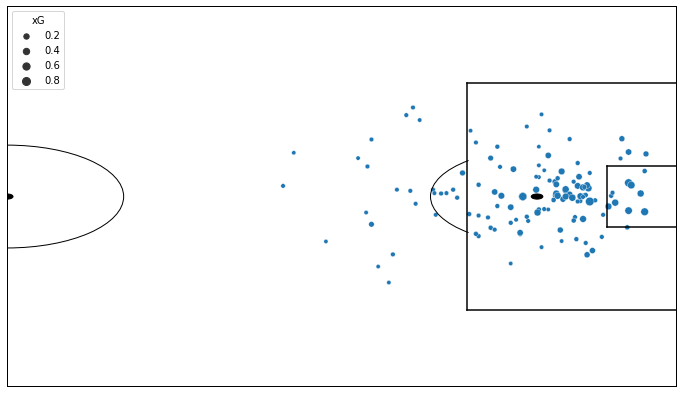

In [ ]:
ax1 = create_full_pitch(x_lims, y_lims)

sns.scatterplot(x="X", y="Y", data=shots_df[shots_df["Player"] == "Robert Lewandowski"], size="xG", ax=ax1)

ax1.set_xlim([x_mid, x_lims[1]])
ax1.set_ylim(y_lims)

(0.0, 0.74)

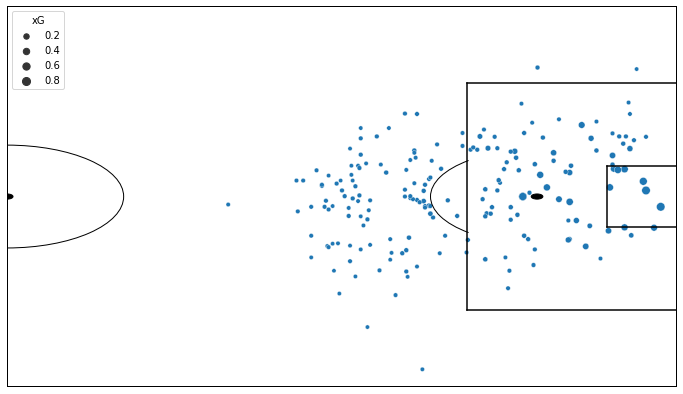

In [ ]:
ax2 = create_full_pitch(x_lims, y_lims)

sns.scatterplot(x="X", y="Y", data=shots_df[shots_df["Player"] == "Messi"], size="xG", ax=ax2)

ax2.set_xlim([x_mid, x_lims[1]])
ax2.set_ylim(y_lims)

Insigne Heat Map


(0.0, 0.74)

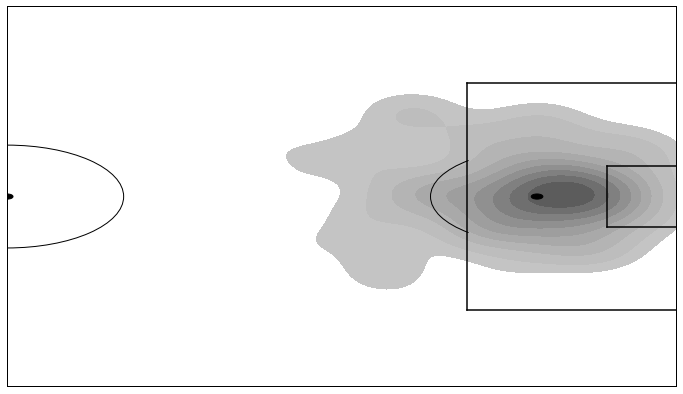

In [ ]:
ax1 = create_full_pitch(x_lims, y_lims)
print("Insigne Heat Map")
sns.kdeplot(x="X", y="Y", data=shots_df[shots_df["Player"] == "Robert Lewandowski"], shade=True, n_levels=10, ax=ax1, color="black")

ax1.set_xlim([x_mid, x_lims[1]])
ax1.set_ylim(y_lims)

(0.0, 0.74)

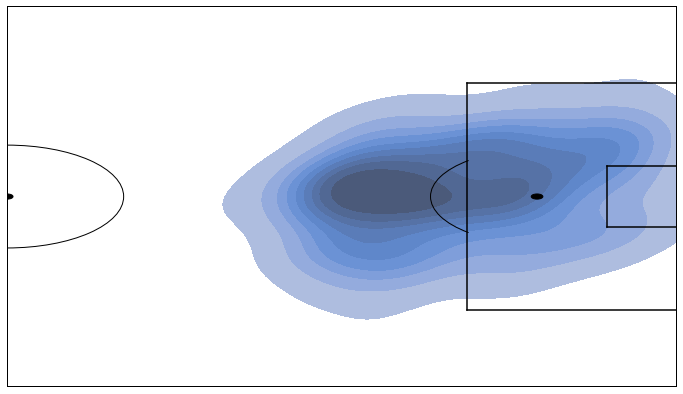

In [ ]:
ax1 = create_full_pitch(x_lims, y_lims)

sns.kdeplot(x="X", y="Y", data=shots_df[shots_df["Player"] == "Messi"], shade=True, n_levels=10, ax=ax1, color="#152238")

ax1.set_xlim([x_mid, x_lims[1]])
ax1.set_ylim(y_lims)

In [ ]:
season_wise_meta_df

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
1,Robert Lewandowski,FW,29,41,135,2467,32.077352,7,4.815550,32,2020,Bayern Munich,4,0,33,25.257362,31.740176,5.689343
1,Messi,FW,35,30,195,3017,26.676843,9,11.422848,77,2020,Barcelona,4,0,27,22.960455,37.906863,20.337363


In [ ]:
radar_df = season_wise_meta_df.groupby(["Player"])[num_cols].sum().reset_index()

In [ ]:
radar_df

,Player,games,goals,shots,time,xG,assists,xA,key_passes,season,yellow,red,npg,npxG,xGChain,xGBuildup
0,Messi,35,30,195,3017,26.676843,9,11.422848,77,2020,4,0,27,22.960455,37.906863,20.337363
1,Robert Lewandowski,29,41,135,2467,32.077352,7,4.815550,32,2020,4,0,33,25.257362,31.740176,5.689343


In [ ]:
radar_df.columns

Index(['Player', 'games', 'goals', 'shots', 'time', 'xG', 'assists', 'xA',
       'key_passes', 'season', 'yellow', 'red', 'npg', 'npxG', 'xGChain',
       'xGBuildup'],
      dtype='object')

In [ ]:
cols_for_radar = ['goals', 'shots', 'xG',
                  'assists', 'xA', 'key_passes',
                  'npg', 'npxG', 'xGChain', 'xGBuildup']

In [ ]:
per90Cols = ['goals', 'shots', 'xG',
             'assists', 'xA', 'key_passes', 'xGChain', 'xGBuildup']

for col in per90Cols:
    radar_df[col + "Per90"] = radar_df[col].divide(radar_df["time"]).multiply(90)

In [ ]:
cols_for_radar = [i + "Per90" for i in per90Cols]

In [ ]:
radar_df[cols_for_radar]

,goalsPer90,shotsPer90,xGPer90,assistsPer90,xAPer90,key_passesPer90,xGChainPer90,xGBuildupPer90
0,0.894929,5.817037,0.795796,0.268479,0.340754,2.296984,1.130798,0.606683
1,1.495744,4.925010,1.170232,0.255371,0.175679,1.167410,1.157931,0.207556


In [ ]:
radar_df[cols_for_radar].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   goalsPer90       2 non-null      float64
 1   shotsPer90       2 non-null      float64
 2   xGPer90          2 non-null      float64
 3   assistsPer90     2 non-null      float64
 4   xAPer90          2 non-null      float64
 5   key_passesPer90  2 non-null      float64
 6   xGChainPer90     2 non-null      float64
 7   xGBuildupPer90   2 non-null      float64
dtypes: float64(8)
memory usage: 256.0 bytes


In [ ]:
radar_df

,Player,games,goals,shots,time,xG,assists,xA,key_passes,season,yellow,red,npg,npxG,xGChain,xGBuildup,goalsPer90,shotsPer90,xGPer90,assistsPer90,xAPer90,key_passesPer90,xGChainPer90,xGBuildupPer90
0,Messi,35,30,195,3017,26.676843,9,11.422848,77,2020,4,0,27,22.960455,37.906863,20.337363,0.894929,5.817037,0.795796,0.268479,0.340754,2.296984,1.130798,0.606683
1,Robert Lewandowski,29,41,135,2467,32.077352,7,4.815550,32,2020,4,0,33,25.257362,31.740176,5.689343,1.495744,4.925010,1.170232,0.255371,0.175679,1.167410,1.157931,0.207556


In [ ]:
# Initiate the plotly go figure
fig = go.Figure()
# Add Radar plots for different players:
fig.add_trace(go.Scatterpolar(
    r=radar_df.loc[(radar_df["Player"] == "Robert Lewandowski"), cols_for_radar].sum(),
    theta=cols_for_radar,
    fill='toself',
    name='Robert Lewandowski'))
fig.add_trace(go.Scatterpolar(
    r=radar_df.loc[(radar_df["Player"] == "Messi"), cols_for_radar].sum(),
    theta=cols_for_radar,
    fill='toself',
    name="Messi"))
# Additional properties for the plot:
fig.update_layout(
    title="Robert Lewandowski vs Messi 2020-21 League Season",
polar=dict(
    radialaxis=dict(
    visible=True,
    )),
showlegend=True
)
fig.show()